<a href="https://colab.research.google.com/github/u1353279/filtering/blob/master/K_means_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

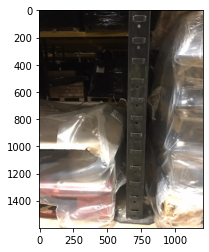

In [2]:
image = plt.imread('/content/drive/My Drive/Warehouse data/a/train/Normal/03b2ebd8-1ce6-4ef9-a0de-dadc2e8105c8.jpg')
image.shape
plt.imshow(image)

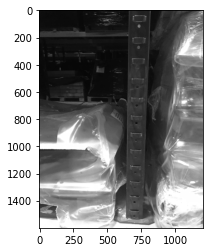

In [3]:

gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

In [4]:
gray.shape

(1600, 1200)

(1600, 1200, 3)


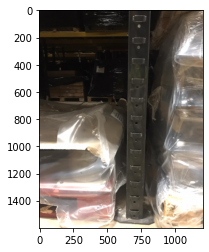

In [5]:
pic = plt.imread('/content/drive/My Drive/Warehouse data/a/train/Normal/03b2ebd8-1ce6-4ef9-a0de-dadc2e8105c8.jpg')/255  # dividing by 255 to bring the pixel values between 0 and 1
print(pic.shape)
plt.imshow(pic)

In [6]:
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape

(1920000, 3)

K-means clustering

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

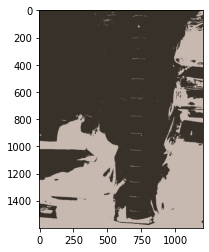

In [10]:
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)

# Sobel filtering

In [11]:
# converting to grayscale
gray = rgb2gray(image)

# defining the sobel filters
sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
print(sobel_horizontal, 'is a kernel for detecting horizontal edges')
 
sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])
print(sobel_vertical, 'is a kernel for detecting vertical edges')

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] is a kernel for detecting horizontal edges
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] is a kernel for detecting vertical edges


In [12]:
out_h = ndimage.convolve(gray, sobel_horizontal, mode='reflect')
out_v = ndimage.convolve(gray, sobel_vertical, mode='reflect')
# here mode determines how the input array is extended when the filter overlaps a border.

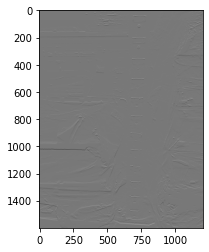

In [13]:
plt.imshow(out_h, cmap='gray')

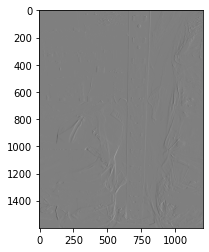

In [14]:
plt.imshow(out_v, cmap='gray')

Laplace (both in one)

In [15]:
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])
print(kernel_laplace, 'is a laplacian kernel')

[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]] is a laplacian kernel


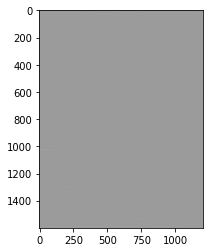

In [16]:
out_l = ndimage.convolve(gray, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')

Reload iMage

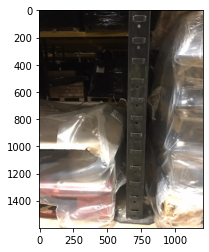

In [25]:
img = plt.imread('/content/drive/My Drive/Warehouse data/a/train/Normal/03b2ebd8-1ce6-4ef9-a0de-dadc2e8105c8.jpg', cv2.COLOR_BGR2RGB)
img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

# Prewitt Operator

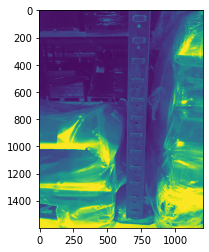

In [29]:

prewittx = np.array([[-1, 0, 1], [-1, 0, 1],[-1, 0, 1]])
prewitty = np.array([[-1, -1, -1], [0, 0, 0],[1, 1, 1]])
vertical_edge = cv2.filter2D(img_bw, -1, prewittx)
horizontal_edge = cv2.filter2D(img_bw, -1, prewitty)

plt.imshow(img_bw)

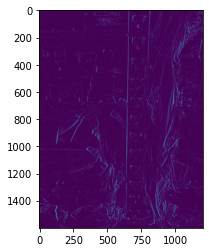

In [30]:
plt.imshow(vertical_edge)

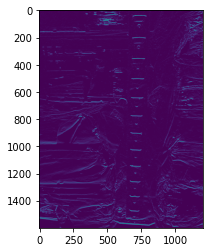

In [31]:
plt.imshow(horizontal_edge)

# Sobel Operator

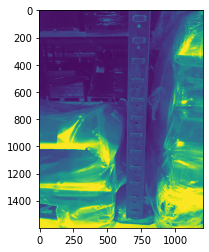

In [32]:

sobelx = np.array([[-1, 0, 1], [-2, 0, 2],[-1, 0, 1]])
sobely = np.array([[-1, -2, -1], [0, 0, 0],[1, 2, 1]])
vertical_edge = cv2.filter2D(img_bw, -1, sobelx)
horizontal_edge = cv2.filter2D(img_bw, -1, sobely)

plt.imshow(img_bw)

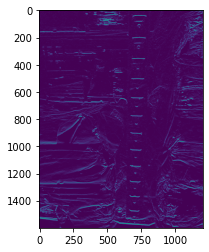

In [33]:
plt.imshow(horizontal_edge)

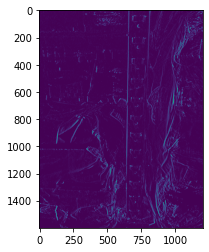

In [34]:
plt.imshow(vertical_edge)